<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/Convolutional_Neural_Networks_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

In [0]:
!pip install google_images_download

In [0]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 2. maxresdefault.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 3. best-national-parks-in-usa-for-wildlife-watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 4. voya_web_deer.jpg
Image URL: https://npca.s3.amazonaws.com/images/9230/084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg?1446660999
Completed Image ====> 5. 084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg
Image URL: https://www.princess.com/images/global/learn/cruise-destinations/

In [0]:
absolute_image_paths 

{'animal national park': ['/content/downloads/animal national park/1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
  '/content/downloads/animal national park/2. maxresdefault.jpg',
  '/content/downloads/animal national park/3. best-national-parks-in-usa-for-wildlife-watching.jpg',
  '/content/downloads/animal national park/4. voya_web_deer.jpg',
  '/content/downloads/animal national park/5. 084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg',
  '/content/downloads/animal national park/6. spot-denali-national-parks-animals.jpg',
  '/content/downloads/animal national park/7. ark_6.jpg',
  '/content/downloads/animal national park/8. royal-bengal-tiger.jpg',
  '/content/downloads/animal national park/9. zebras-in-kidepo-750x450.jpg',
  '/content/downloads/animal national park/10. 2014-06-03-chitwannationalparkolance.jpg',
  '/content/downloads/animal national park/11. addo-elephant-national-park-elephants-590x390.jpg',
  '/content/downloads/animal national park/12. ?media_id=130047193330

In [0]:
# Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np

# https://pillow.readthedocs.io/en/stable/
from PIL import Image, ImageOps  

import tensorflow as tf
import tensorflow_hub as hub

In [0]:
# Resize all images to 224x224 pixels
image_path_list = absolute_image_paths['animal national park']

def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)

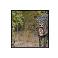

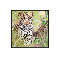

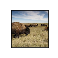

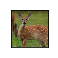

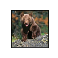

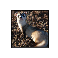

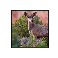

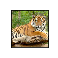

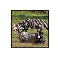

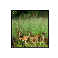

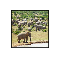

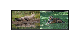

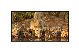

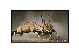

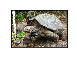

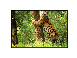

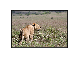

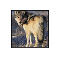

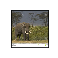

In [0]:
# Show images

def show_images(images_list):
    plt.figure()
    for i, path in enumerate(images_list):
        if path != faulty_img:
            plt.subplot(5,5, i+1)
            plt.imshow(np.asarray(Image.open(path)))
            #plt.title(path)
            plt.grid(False)
            plt.yticks([])
            plt.xticks([])
        plt.show()

show_images(images_list)

In [0]:
# Making Predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_classifier(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    return results

In [0]:
predictions = []
for path in images_list:
        if path != faulty_img:
            result = img_classifier(process_img_path(path))
            predictions.append(result)
            print(result)

[('n02396427', 'wild_boar', 0.3052469), ('n02114367', 'timber_wolf', 0.2662477), ('n02114712', 'red_wolf', 0.13834843)]
[('n02128385', 'leopard', 0.8991522), ('n02128925', 'jaguar', 0.098807804), ('n02130308', 'cheetah', 0.00082418625)]
[('n02410509', 'bison', 0.9999025), ('n02408429', 'water_buffalo', 5.9457845e-05), ('n02403003', 'ox', 1.5783124e-05)]
[('n02423022', 'gazelle', 0.5517638), ('n02422699', 'impala', 0.36544874), ('n02417914', 'ibex', 0.011862522)]
[('n02132136', 'brown_bear', 0.9834398), ('n02133161', 'American_black_bear', 0.014100538), ('n02134418', 'sloth_bear', 0.0019520944)]
[('n02443484', 'black-footed_ferret', 0.8328265), ('n02441942', 'weasel', 0.13311455), ('n02447366', 'badger', 0.005035466)]
[('n02422699', 'impala', 0.31281516), ('n02415577', 'bighorn', 0.2630435), ('n02423022', 'gazelle', 0.20849313)]
[('n02129604', 'tiger', 0.90148956), ('n02123159', 'tiger_cat', 0.09641893), ('n02128925', 'jaguar', 0.0011145544)]
[('n02391049', 'zebra', 0.99980074), ('n0179

In [0]:
for path, prediction in zip(image_path_list, predictions):
  
  for _, animal, prob in prediction:
    print(f'{animal}: {prob:.3f}')

  plt.subplot()
  plt.imshow(np.asarray(Image.open(path)))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.show()
  print()

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"

## Resources and Stretch Goals
Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language